<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-zhouy185/blob/main/Grading_Scheme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Grading Scheme*

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:**

**Student Number:**

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

**CSV file can be found here**: [Link](https://www.dropbox.com/scl/fi/vaquh16ipjc1pvfh9t8or/nata_supermarket.csv?rlkey=rc6ggwlnsvqezaffe4xbftsyn&st=lg5a8ds5&dl=0). Student may use a different file name.

In [33]:
## Load as pd data frame: 2pts; loading from excel directly is ok
## Display first few rows: 2pts

import pandas as pd
df = pd.read_csv('/content/nata_supermarket.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [34]:
## Find out number of rows: 3pts
## Find out number of cols: 3pts
## For any questions asked, they need to answer explicitly,
## ideally in text, but using python code to display/print, or in comment is ok

print(df.info())

print(f"number of rows: {len(df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [35]:
# Check missing values: 4pts
print(df.isnull().sum())

# Answer which columns have missing values and how many: 3pts

# Appy a missing value handling method (4pts); explain (3pts)

df.dropna(inplace=True)
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [36]:
# Identify any columns with constant values: 5pts
display(df.describe().loc['std'])
df[['Z_CostContact', 'Z_Revenue']]

# Drop the two columns: 5pts

df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
df.columns

,std
ID,3249.376275
Year_Birth,11.985554
Income,25173.076661
Kidhome,0.536896
Teenhome,0.544181
Recency,28.948352
MntWines,337.327920
MntFruits,39.793917
MntMeatProducts,224.283273
MntFishProducts,54.752082


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [37]:
# Check how many columns remain: 4pts

len(df.columns)


27

## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [38]:
# Convert to date time format: 4pts
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"], format='mixed')


In [39]:
# Calculate customer days with Nata: 8pts
from datetime import datetime
today = datetime.today()
df["Customer_Days"] = today-df["Dt_Customer"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,4946 days 17:25:35.460045
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,4100 days 17:25:35.460045
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,4447 days 17:25:35.460045
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,4040 days 17:25:35.460045
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,4296 days 17:25:35.460045


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

In [40]:
# Education value counts: 2pts
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [41]:
# Marital value counts: 2pts
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


<Axes: title={'center': 'Education Distribution'}, ylabel='count'>

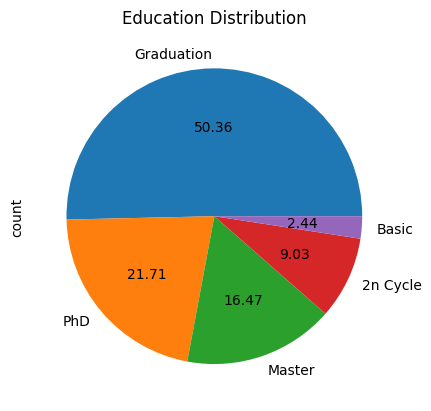

In [42]:
# Education pie chart: 3pts
df['Education'].value_counts().plot(kind='pie', autopct='%.2f',title='Education Distribution')

<Axes: title={'center': 'Education Distribution'}, ylabel='count'>

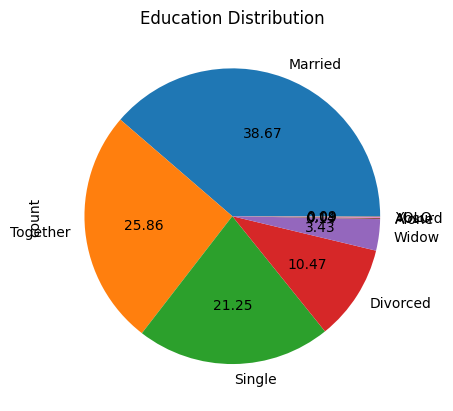

In [43]:
# Marital pie chart: 3pts
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%.2f',
                                         title='Education Distribution',
                                         )

Comment on the target populations: 5pts.


* Education: The majority of customers have a 'Graduation' degree, followed by 'PhD' and 'Master' degrees. This suggests that Nata Supermarkets' customer base is highly educated. (2 pts)

* Marital Status: The largest group of customers are 'Married', followed by those who are 'Together' (living with a partner). 'Single' customers also represent a significant portion. (2pts)

* These findings suggest that Nata Supermarkets' target demographic is likely well-educated individuals, many of whom are married or in a committed relationship. (1pt)

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

<Axes: title={'center': 'Income Distribution'}, ylabel='Income Level'>

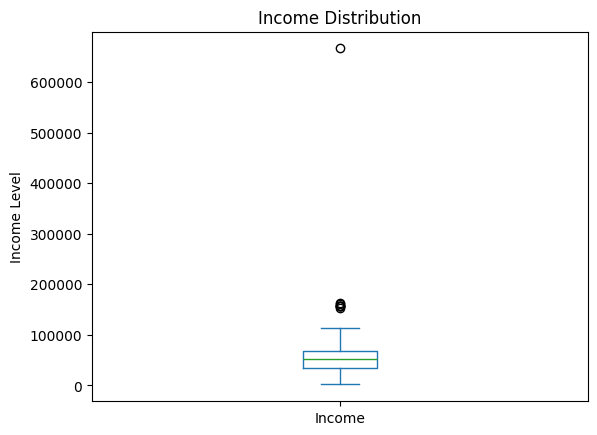

In [44]:
# Income plot: 3pts
df['Income'].plot(kind='box',ylabel="Income Level",title="Income Distribution")

<Axes: title={'center': 'Children Distribution'}, ylabel='# of Children'>

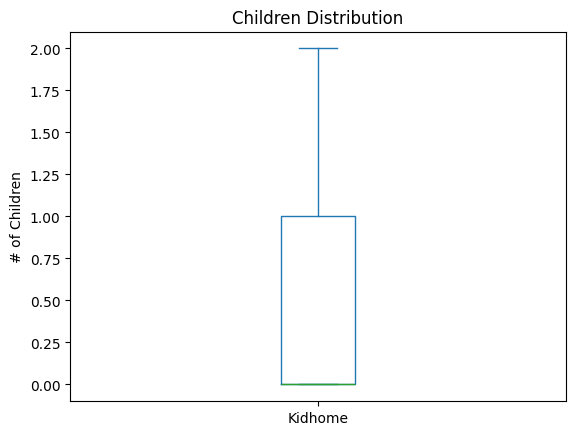

In [45]:
# Kidhome plot: 3pts
df['Kidhome'].plot(kind='box',ylabel="# of Children",title="Children Distribution")

<Axes: title={'center': 'Teens Distribution'}, ylabel='# of Teens'>

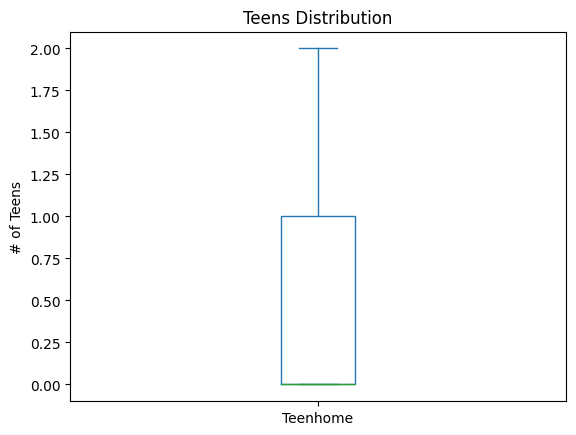

In [46]:
# Teen home: 3pts
df['Teenhome'].plot(kind='box',ylabel="# of Teens",title="Teens Distribution")

Comment on findings.

* Income: The income distribution shows a significant range, with a median income around 50,000-60,000. (Numbers do not need to be exact.) There are some outliers with much higher incomes, indicating a portion of customers are high-earners. **2pts**.

* Kidhome: The majority of customers have 0 or 1 child at home. There are a few customers with 2 children, but having more than 2 children is uncommon in this dataset. **1.5pt**

* Teenhome: Similar to Kidhome, the majority of customers have 0 or 1 teenager at home. Having 2 teenagers is less common. **1.5pt**

Overall, the typical household profile of Nata's customers appears to be that of well-educated individuals (as observed earlier) with moderate to high incomes, and a small number of children or teenagers living at home. **1pt**

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [47]:
# Quick examination of the columns;
# as long as they provide some statistics such as mean and std, or sum
# 5pts

df_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
df_spending.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [48]:
# 10 pts total

# Find the subtotals: 5pts
df_spending_total = df_spending.sum()
display(df_spending_total)

# Find the highest spending: 3pts
max(df_spending_total.values)

# Clear conclusion: 2pts

,0
MntWines,676083
MntFruits,58405
MntMeatProducts,370063
MntFishProducts,83405
MntSweetProducts,59896
MntGoldProds,97427


np.int64(676083)

## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.